In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import sklearn.manifold
import sklearn.preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn import ensemble
from clusters_2dplot import plot2dclust
from sklearn.model_selection import cross_val_score
seed = 222
np.random.seed(seed)

plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['figure.dpi'] = 80

In [2]:
d = pd.read_csv('dataQ1.csv')
d.describe(include='all')

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.057022,553.003269,1.054483,0.701131,0.736868,0.859340,31.149492,10.305592,-1.949348,0.984833,...,1.145131,0.840395,0.002004,0.001088,0.000271,0.524458,0.484279,0.512679,0.496610,10.014347
std,0.147410,130.267183,0.067425,0.123221,0.049763,0.055199,4.258271,1.490066,50.084846,0.019152,...,0.125255,0.199858,0.001178,0.000398,0.000091,0.284782,0.288901,0.292909,0.283109,3.921924
min,-0.311139,131.524080,0.976337,0.193196,0.490756,0.514183,18.309758,3.820828,-86.098734,0.748921,...,0.826450,0.310943,0.000603,0.000463,0.000110,0.001427,0.001851,0.002723,0.002147,-0.725869
25%,-0.052277,463.159992,1.009706,0.635720,0.710515,0.835857,28.548397,9.407698,-47.700312,0.981636,...,1.075586,0.709466,0.001241,0.000841,0.000215,0.271238,0.236095,0.263845,0.260970,7.351624
50%,0.037095,534.316574,1.038332,0.724469,0.743690,0.872776,30.934752,10.287894,-1.288970,0.989244,...,1.122728,0.890676,0.001652,0.001011,0.000252,0.542873,0.487718,0.519404,0.491402,10.001192
75%,0.167309,643.491835,1.078852,0.784457,0.768157,0.895503,33.798244,11.462484,42.253776,0.994375,...,1.198823,0.990520,0.002296,0.001236,0.000306,0.762967,0.720367,0.768348,0.746178,12.736885
max,0.577937,1160.083484,1.544633,0.950813,0.851468,0.942427,50.259231,14.200173,85.651345,1.020352,...,1.701958,1.231477,0.009718,0.003446,0.000793,0.999111,0.995256,0.999793,0.998271,20.372454


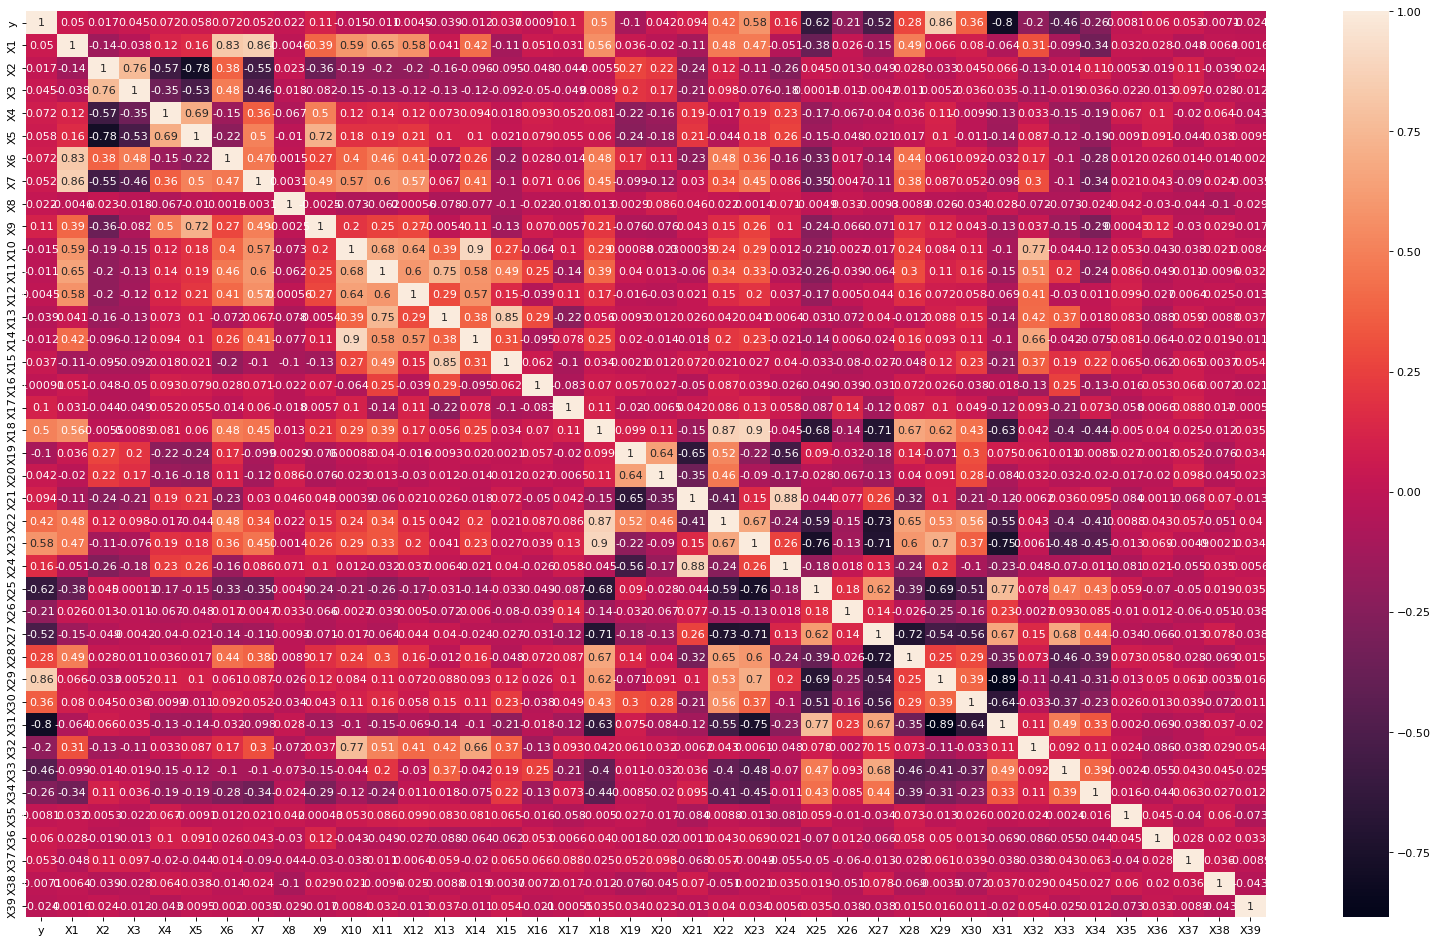

In [3]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(d.corr(), annot=True, ax=ax)
plt.savefig('plots/corrplot.pdf')
plt.show()

In [4]:
X = d.drop(['y'], axis=1)

#we are going to explore features so we need to transpose.
X = X.T
sc = StandardScaler()
X = sc.fit_transform(X)

For n_clusters = 2 The average silhouette_score is : 0.9123298604699417
For n_clusters = 3 The average silhouette_score is : 0.8626831074229705
For n_clusters = 5 The average silhouette_score is : 0.8373228954551589


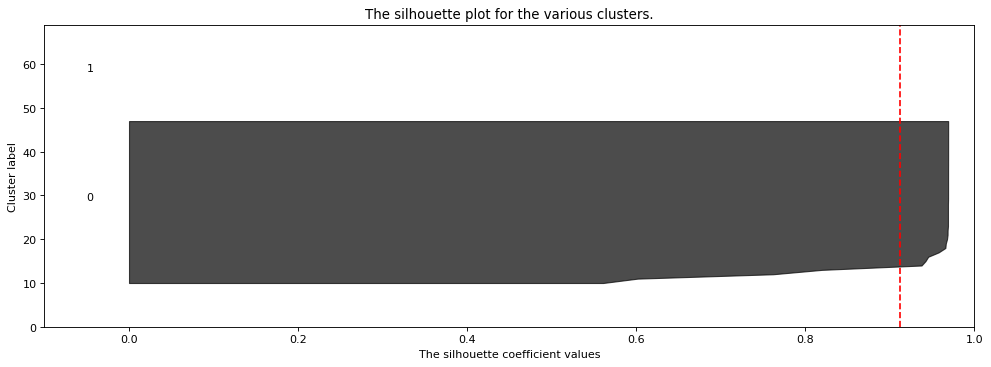

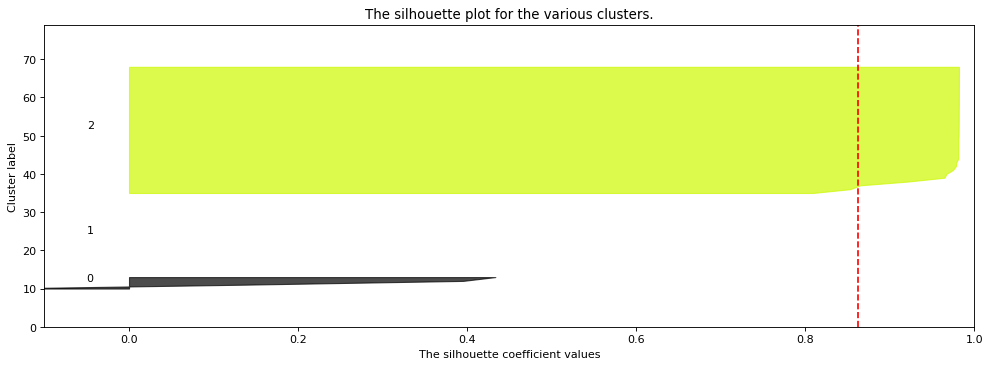

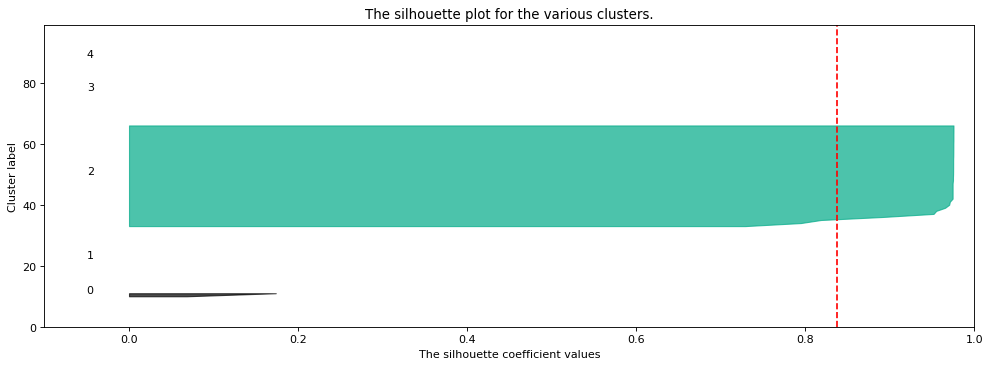

In [5]:
from clusters_2dplot import plot2dclust

all_cls = range(2,20,1)
plt2d = plot2dclust(X, tp = 'km')
all_siluets = plt2d.clustering(aggclust=True, range_n_clusters=all_cls)

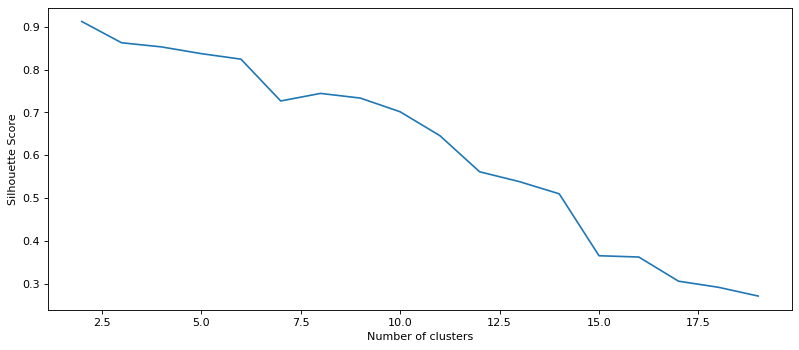

In [6]:
plt.plot(all_cls, all_siluets)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.savefig('plots/silhouette.pdf')

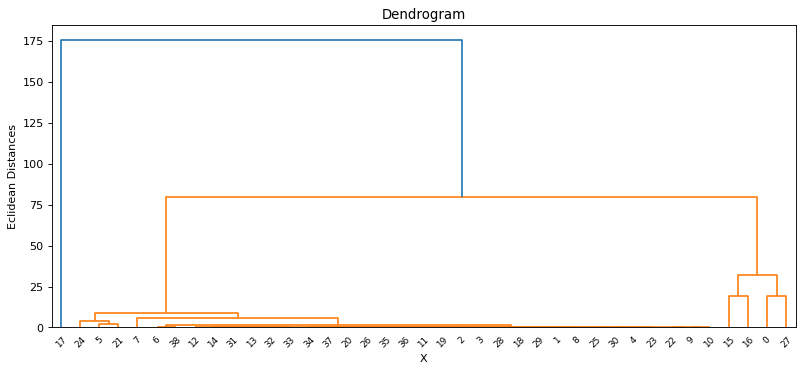

[2493.23663863  457.41245915 1080.7350773  ... 4849.30426668  419.26657597
 4715.77295753]


In [7]:
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), 
    show_leaf_counts=False, no_labels=False)
plt.title("Dendrogram")
plt.xlabel("X")
plt.ylabel("Eclidean Distances")
plt.savefig('plots/dendogram.pdf')
plt.show()

clusterer = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_predict = clusterer.fit_predict(X)
cluster_labels = clusterer.labels_

clf = NearestCentroid(metric='euclidean')
clf.fit(X, y_predict)

y = pdist(d)
print(y)

### Part A 2.

In [8]:
# https://www.kaggle.com/minc33/visualizing-high-dimensional-clusters

d = pd.read_csv('dataQ1.csv')
X = d.drop(['y'], axis=1)
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
clusters_linear = kmeans.predict(X)


In [10]:
plt2d = plot2dclust(X, clusters = clusters_linear, tp = 'km')
plt2d.make_plot(ker ='No Kernel')

For n_clusters = 2 The average silhouette_score is : 0.12504312412300153


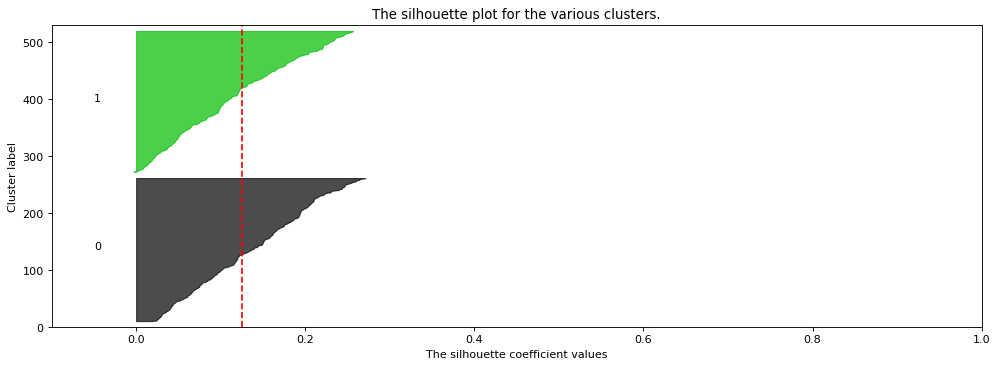

[0.12504312412300153]

In [11]:
plt2d.clustering(range_n_clusters=[2])

#### Now Kernel Kmeans

In [ ]:
# https://gist.github.com/mblondel/6230787 

from kernel_kmeans import KernelKMeans

for ker in ['poly', 'linear', 'polynomial', 'rbf' , 'laplacian', 'cosine', 'sigmoid']:

    kkm = KernelKMeans(n_clusters=2, max_iter=100, kernel=ker, random_state=0, verbose=1)

    d = pd.read_csv('dataQ1.csv')
    X = d.drop(['y'], axis=1)
    sc = StandardScaler()
    X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
    

    clusters = kkm.fit_predict(X)


In [ ]:
#chose the best kernel: polynomial
kkm = KernelKMeans(n_clusters=2, max_iter=100, kernel='polynomial', random_state=0, verbose=1)
d = pd.read_csv('dataQ1.csv')
X = d.drop(['y'], axis=1)
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
clusters_poly = kkm.fit_predict(X)

In [ ]:
#percentage of times the points are in the same cluster
ll =[]
for n, i in enumerate(clusters_linear):
    if i != clusters_poly[n]:
        ll.append(True)
    else:
        ll.append(False)
print(sum(ll) / len(ll))

### Part B 1.

In [21]:
def model_fit(m, X, y, plot = False):

    y_hat = m.predict(X)
    rmse = mean_squared_error(y, y_hat, squared=False)
    print(y.shape)
    print(y_hat.shape)
    res = pd.DataFrame(
            data = {'y': y, 'y_hat': y_hat, 'resid': y - y_hat}
    )
    if plot:
            plt.figure(figsize=(12, 6))
            plt.subplot(121)
            sns.lineplot(x='y', y='y_hat', color="grey", 
            data = pd.DataFrame(data={'y': [min(y),max(y)], 'y_hat': [min(y),max(y)]}))
            sns.scatterplot(x='y', y='y_hat', data=res).set_title("Fit plot")
            plt.subplot(122)
            sns.scatterplot(x='y', y='resid', data=res).set_title("Residual plot")
            plt.suptitle("Model rmse = " + str(round(rmse, 4)), fontsize=16)
            plt.savefig('plots/lasso.pdf')
            plt.show()
    return(rmse)

In [19]:
d = pd.read_csv('dataQ1.csv')
y = d['y']
X = d.drop(['y'], axis=1)

TEST_SIZE = 0.3 

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)

sc = StandardScaler()

In [14]:
alphas = np.linspace(0.0001, 0.02, num=80)
l_gs = GridSearchCV(
    make_pipeline(
        StandardScaler(),
        Lasso() 
        ),
        param_grid={'lasso__alpha': alphas}, 
        cv=KFold(5, shuffle=True, random_state=1234), 
        scoring="neg_root_mean_squared_error"
).fit(X_train, y_train)

In [22]:
print( "best alpha:", l_gs.best_params_['lasso__alpha'])
best_alpha = l_gs.best_params_['lasso__alpha']
print( "best rmse :", l_gs.best_score_ * -1)
print( "validation rmse:", model_fit(l_gs.best_estimator_, X_test, y_test, plot=False) )

best alpha: 0.0013594936708860759
best rmse : 0.07337593891978741
(150,)
(150,)
validation rmse: 0.07066500470493108


In [ ]:
cv_res = pd.DataFrame(
    data = l_gs.cv_results_
).filter(
    regex = '(split[0-9]+|mean)_test_score'
).assign(
# Add the alphas as a column 
    alpha = alphas
)
cv_res.update(
# Convert negative rmses to positive
-1 * cv_res.filter(regex = '_test_score')
)
sns.lineplot(x='alpha', y='mean_test_score', data=cv_res)
plt.xlabel('$\lambda$')
plt.ylabel('Negative RMSE')
# plt.savefig('plots/single_l.pdf')
plt.show()

In [ ]:
m = make_pipeline(
    StandardScaler(),
    Lasso(alpha=best_alpha, fit_intercept = False)
).fit(X_train, y_train)

In [ ]:
model_fit(m, X_test, y_test, plot=True)

In [ ]:
all_coef_lasso = m.named_steps['lasso'].coef_

#### Random Forrest

In [ ]:
d = pd.read_csv('dataQ1.csv')
y = d['y']
X = d.drop(['y'], axis=1)

TEST_SIZE = 0.3 

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)

In [ ]:
# model selecion using cross-validation

tuned_parameters = {'n_estimators': [100], 
                    'max_features': [15, 30, 39],
                    'min_samples_leaf': [1,2,3],
                    'max_leaf_nodes': [50, 80, 100]
                    }

clf = GridSearchCV(ensemble.RandomForestRegressor(oob_score=True), tuned_parameters, cv=5, 
                   n_jobs=-1, verbose=1).fit(X_train, y_train)
clf.best_estimator_

In [ ]:
model = clf.best_estimator_
model.fit(X_train, y_train)

In [ ]:
yhat_oob = model.oob_prediction_
yhat = model.predict(X_train)

plt.scatter(y_train, yhat, color='red', marker='.', label='yhat')
plt.scatter(y_train, yhat_oob, color='teal', marker='.', label='yhat_oob')
plt.axline((0, 0), slope=1, color="black")
plt.xlabel('y')
plt.ylabel('prediction')
plt.legend()

In [ ]:

def train_pred_mse(model, train_X, train_y, test_X, test_y):
    model.fit(train_X, train_y)
    pred_y = model.predict(test_X)
    return mean_squared_error(pred_y, test_y)


default_model = ensemble.RandomForestRegressor(random_state=1234)
default_mse = train_pred_mse(default_model, X_train, y_train, X_test, y_test)

tuned_mse = train_pred_mse(model, X_train, y_train, X_test, y_test)

print(f'Tuned model MSE: {round(tuned_mse, 5)}')
print(f'Default model MSE: {round(default_mse, 5)}')

In [ ]:
model_fit(model, X_test, y_test, plot=True)

#### 2. Variable Importance - Random Forrests

In [ ]:
# Feature importance based on mean decrease in impurity
from sklearn.inspection import permutation_importance
from scipy.stats import spearmanr

impurity_importances = model.feature_importances_

mse_importances = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
).importances_mean

In [ ]:
# Normalise
mse_importances = mse_importances / mse_importances.sum()
impurity_importances = impurity_importances / impurity_importances.sum()
lasso_importances = np.abs(all_coef_lasso)


correl = round(spearmanr(impurity_importances, lasso_importances).correlation, 4)

df = pd.DataFrame.from_dict({
    'variable': d.columns[1:],
    'IncNodePurity': impurity_importances,
    'Lasso coefficients': np.abs(all_coef_lasso / np.abs(all_coef_lasso).sum())
})
df = df.set_index('variable')
df = df.sort_index()

df.plot.bar()
plt.xlabel('variable')
plt.ylabel('normalised_importance')
plt.xticks(rotation=45)
plt.savefig('plots/importances.pdf')
plt.show()

### 2. train/test split importance

In [ ]:
d = pd.read_csv('dataQ1.csv')
y = d['y'].values
X = d.drop(['y'], axis=1).values
TEST_SIZE = 0.3 

In [ ]:
#lasso

NUM_TRIALS = 20

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)
all_best_alpha1 = []
all_rmse1 = []
all_coefs1 = []

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(
            make_pipeline(
                StandardScaler(),
                Lasso() 
                ),
                param_grid={'lasso__alpha': alphas}, 
                cv=inner_cv, 
                scoring="neg_root_mean_squared_error"
        ).fit(X_train, y_train)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    clf = GridSearchCV(
            make_pipeline(
                StandardScaler(),
                Lasso() 
                ),
                param_grid={'lasso__alpha': alphas}, 
                cv=inner_cv, 
                scoring="neg_root_mean_squared_error"
        ).fit(X_train, y_train)
    nested_score = cross_val_score(clf, X=X_train, y=y_train, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

    best_alpha = clf.best_params_['lasso__alpha']
    m = make_pipeline(
    StandardScaler(),
    Lasso(alpha=best_alpha, fit_intercept = False)
    ).fit(X_train, y_train)
    rmse = model_fit(m, X_test, y_test, plot=False)
    all_coef_lasso = m.named_steps['lasso'].coef_
    all_best_alpha1.append(best_alpha)
    all_rmse1.append(rmse)
    all_coefs1.append(all_coef_lasso)

score_difference = non_nested_scores - nested_scores


In [ ]:
print(
    "Average difference of {:6f} with std. dev. of {:6f}.".format(
        score_difference.mean(), score_difference.std()
    )
)

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.tight_layout()
plt.subplot(211)
(non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
(nested_line,) = plt.plot(nested_scores, color="b")
plt.ylabel("score", fontsize="9")
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Non-Nested and Nested Cross Validation for Lasso Regression",
    x=0.5,
    y=1.1,
    fontsize="12",
)

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.ylabel("score difference", fontsize="9")

plt.savefig('plots/nested.pdf')
plt.show()

In [ ]:
list_of_important_features = []
another1 = []

for arr in all_coefs1:
    op = np.squeeze(np.where(abs(arr) > 0.01))
    list_of_important_features.append(op)
    if op.shape:
        another1 += list(op)

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(25,8))
plt.subplots_adjust(wspace=0.16)
g = sns.histplot(data=all_best_alpha1, ax=axs[0], stat='count', bins=NUM_TRIALS)
g.set_xlabel('Lambda Hyperparameter')
q = sns.kdeplot(all_rmse1, ax=axs[1])
q.set_xlabel('RMSE')
g = sns.histplot(another1, ax=axs[2])
g.set_xticks([1, 11, 20, 24, 27, 31])
g.set_xlabel('X Features')
fig.savefig('plots/lasso_all.pdf')

In [ ]:
#rf 

NUM_TRIALS = 20
# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)
all_rmse_RF1 = []
all_impurities1 = []

# Loop for each trial
for i in range(NUM_TRIALS):
    print(i)

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(
            make_pipeline(
                StandardScaler(),
                Lasso() 
                ),
                param_grid={'lasso__alpha': alphas}, 
                cv=inner_cv, 
                scoring="neg_root_mean_squared_error"
        ).fit(X_train, y_train)
    non_nested_scores[i] = clf.best_score_



    tuned_parameters = {'n_estimators': [100], 
                'max_features': [30],
                'min_samples_leaf': [1,2,3],
                'max_leaf_nodes': [50, 80, 100]
                }

    # Nested CV with parameter optimization
    clf = GridSearchCV(ensemble.RandomForestRegressor(oob_score=True), tuned_parameters, cv=5, 
                   n_jobs=-1, verbose=0).fit(X_train, y_train)

    nested_score = cross_val_score(clf, X=X_train, y=y_train, cv=outer_cv)
    nested_scores[i] = nested_score.mean()


    model = clf.best_estimator_
    model.fit(X_train, y_train)


    rmse = train_pred_mse(model, X_train, y_train, X_test, y_test)
    all_rmse_RF1.append(rmse)
    impurity_importances = model.feature_importances_ 
    all_impurities1.append(impurity_importances)

score_difference = non_nested_scores - nested_scores